In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score

import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [2]:
data = pd.read_csv('Titanic dataset (1).csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape

(891, 12)

In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above info we can see that the data is missing in columns Age, Cabin, Embarked

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


From the above description we can see that there is possibility of outliers in Age and fare

In [8]:
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


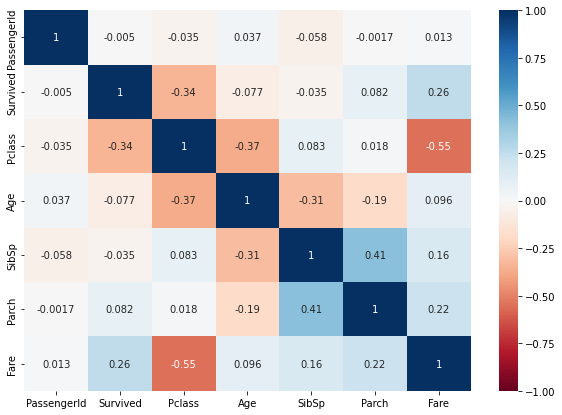

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(numeric_only=True), vmax=1, vmin=-1, annot=True, cmap='RdBu')
plt.show()

## Explore the target variable

Survived
0    549
1    342
Name: count, dtype: int64


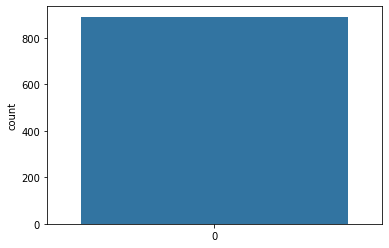

In [10]:
print(data['Survived'].value_counts())
sns.countplot(data['Survived'])
plt.show()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

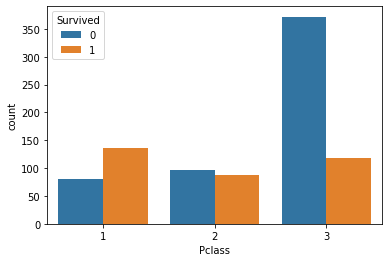

In [11]:
sns.countplot(x=data['Pclass'], hue=data['Survived'])
data.groupby(by=['Pclass','Survived'])['Pclass'].count()

In [12]:
grp_data = data.groupby(by=['Pclass','Survived'])['Pclass'].count()

In [13]:
print('% Survived in 1st Class',((grp_data[1][1])/(grp_data[1][1]+grp_data[1][0]))*100)
print('% Survived in 2nd Class',((grp_data[2][1])/(grp_data[2][1]+grp_data[2][0]))*100)
print('% Survived in 3rd Class',((grp_data[3][1])/(grp_data[3][1]+grp_data[3][0]))*100)

% Survived in 1st Class 62.96296296296296
% Survived in 2nd Class 47.28260869565217
% Survived in 3rd Class 24.236252545824847


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

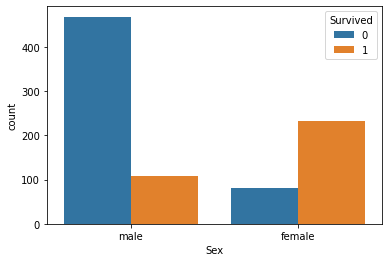

In [14]:
sns.countplot(x=data['Sex'], hue=data['Survived'])
data.groupby(by=['Sex','Survived'])['Sex'].count()

In [15]:
gender = data.groupby(by=['Sex','Survived'])['Sex'].count()

In [16]:
print('% survived female',(gender['female'][1]/(gender['female'][1]+gender['female'][0]))*100)
print('% survived male',(gender['male'][1]/(gender['male'][1]+gender['male'][0]))*100)

% survived female 74.20382165605095
% survived male 18.890814558058924


Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Embarked, dtype: int64

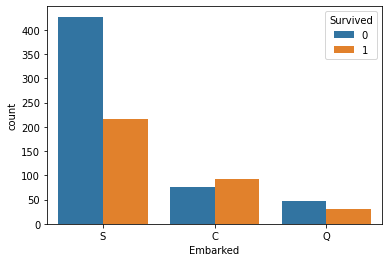

In [17]:
sns.countplot(x=data['Embarked'], hue=data['Survived'])
data.groupby(by=['Embarked','Survived'])['Embarked'].count()

# Detect and treat the Missing values

In [18]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [19]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [20]:
data.groupby(by=['Pclass','Embarked'])['Fare'].median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [21]:
data['Embarked'].fillna('C', inplace=True)

In [22]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [23]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [24]:
data.groupby(by=['SibSp','Parch'])['Age'].median()

SibSp  Parch
0      0        29.5
       1        27.0
       2        20.5
       3        24.0
       4        29.0
       5        40.0
1      0        30.0
       1        30.5
       2        24.0
       3        48.0
       4        45.0
       5        39.0
       6        43.0
2      0        28.0
       1         4.0
       2        19.5
       3        24.0
3      0        31.5
       1         3.0
       2        10.0
4      1         7.0
       2         6.0
5      2        11.0
8      2         NaN
Name: Age, dtype: float64

In [25]:
data['Age'].median()

28.0

<Axes: xlabel='SibSp', ylabel='count'>

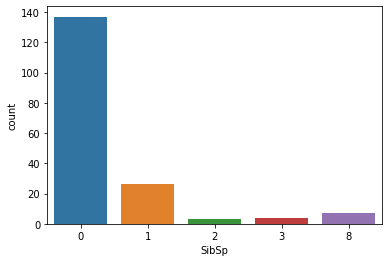

In [26]:
age_missing = data[data['Age'].isnull()]
sns.countplot(x =age_missing['SibSp'] )

In [27]:
data['Age'].fillna(28.0, inplace=True)

In [28]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [29]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
dtype: float64

In [30]:
# Since 77% of data is missing in cabin we can delete this column
del data['Cabin']

In [31]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Outlier Detection and Treatment

<Axes: >

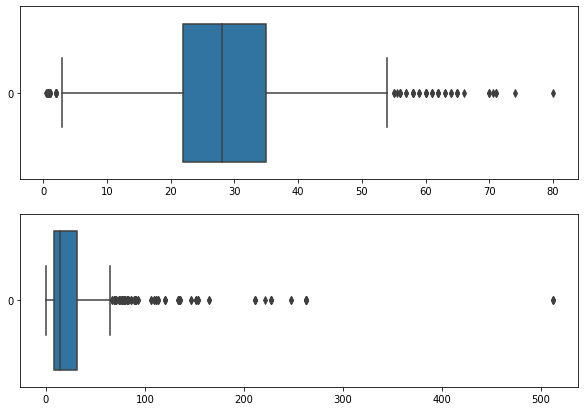

In [32]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.boxplot(data['Age'],orient='h')
plt.subplot(2,1,2)
sns.boxplot(data['Fare'],orient='h')

In [33]:
data[data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [34]:
data[(data['Pclass']==1)&(data['Embarked']=='C')]['Fare'].median()

79.2

In [35]:
data.drop(index=data[data['Fare']>500].index, inplace=True)

<Axes: >

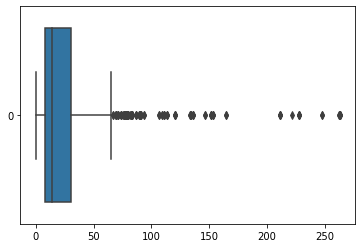

In [36]:

sns.boxplot(data['Fare'],orient='h')

## Feature Selection

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
data.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [39]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Feature Engineering

In [40]:
le = LabelEncoder()

In [41]:
data['Sex'] = le.fit_transform(data['Sex'])

In [42]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [43]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [44]:
data = pd.get_dummies(data, drop_first=True,dtype=int)

In [45]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


## Train Test Split

In [46]:
x = data.drop(columns=['Survived'])
y = data['Survived']

In [47]:
x_train,x_test, y_train, y_test = train_test_split(x,y, stratify=y, train_size=0.8, random_state=2)

In [48]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(710, 8) (178, 8) (710,) (178,)


## Scalling

In [49]:
for i in ['Age','Fare']:
    sc= StandardScaler()
    x_train[i] = sc.fit_transform(pd.DataFrame(x_train[i]))
    x_test[i] = sc.transform(pd.DataFrame(x_test[i]))

## Neural Network

In [50]:
model = Sequential()
model.add(Dense(50,input_dim = 8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [51]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [52]:
history=model.fit(x_train,y_train,epochs=200,verbose=1)

Epoch 1/200
23/23 [==============================] - 1s 6ms/step - loss: 0.6061 - accuracy: 0.6690
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5321 - accuracy: 0.7465
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5173 - accuracy: 0.7620
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4948 - accuracy: 0.7803
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4975 - accuracy: 0.7887
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4820 - accuracy: 0.7930
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4754 - accuracy: 0.7958
Epoch 8/200
23/23 [==============================] - 0s 6ms/step - loss: 0.4615 - accuracy: 0.8000
Epoch 9/200
23/23 [==============================] - 0s 6ms/step - loss: 0.4516 - accuracy: 0.8141
Epoch 10/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4423 - accuracy: 0.8197
Epoch 11/

23/23 [==============================] - 0s 5ms/step - loss: 0.3407 - accuracy: 0.8465
Epoch 84/200
23/23 [==============================] - 0s 6ms/step - loss: 0.3565 - accuracy: 0.8437
Epoch 85/200
23/23 [==============================] - 0s 6ms/step - loss: 0.3552 - accuracy: 0.8479
Epoch 86/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3504 - accuracy: 0.8380
Epoch 87/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3555 - accuracy: 0.8521
Epoch 88/200
23/23 [==============================] - 0s 6ms/step - loss: 0.3470 - accuracy: 0.8465
Epoch 89/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3527 - accuracy: 0.8465
Epoch 90/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3464 - accuracy: 0.8437
Epoch 91/200
23/23 [==============================] - 0s 6ms/step - loss: 0.3346 - accuracy: 0.8493
Epoch 92/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3577 - accuracy: 0.8521
Epoch 93/200


23/23 [==============================] - 0s 5ms/step - loss: 0.3169 - accuracy: 0.8718
Epoch 165/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3063 - accuracy: 0.8732
Epoch 166/200
23/23 [==============================] - 0s 6ms/step - loss: 0.2980 - accuracy: 0.8873
Epoch 167/200
23/23 [==============================] - 0s 6ms/step - loss: 0.3063 - accuracy: 0.8803
Epoch 168/200
23/23 [==============================] - 0s 6ms/step - loss: 0.3273 - accuracy: 0.8549
Epoch 169/200
23/23 [==============================] - 0s 6ms/step - loss: 0.3388 - accuracy: 0.8634
Epoch 170/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3002 - accuracy: 0.8775
Epoch 171/200
23/23 [==============================] - 0s 5ms/step - loss: 0.2994 - accuracy: 0.8831
Epoch 172/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3148 - accuracy: 0.8761
Epoch 173/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3001 - accuracy: 0.8789
Epoc

In [53]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

Text(0, 0.5, '%age')

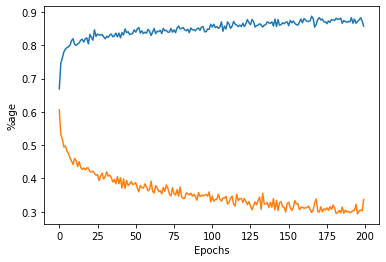

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('%age')

In [55]:
test_eval = model.evaluate(x_test,y_test, verbose=1)

6/6 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.8202


In [56]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [57]:
y_pred

array([[1.68395415e-01],
       [6.57416403e-01],
       [4.11451608e-03],
       [2.05347613e-02],
       [4.64855731e-01],
       [1.67421758e-01],
       [9.03497398e-01],
       [9.19328332e-01],
       [3.44114929e-01],
       [1.67254686e-01],
       [9.69243273e-02],
       [8.88412833e-01],
       [5.46322539e-02],
       [6.22455627e-02],
       [9.99429822e-01],
       [7.66117394e-01],
       [1.90380454e-01],
       [1.63613021e-01],
       [1.66951939e-01],
       [1.00000000e+00],
       [8.81948411e-01],
       [1.19112164e-01],
       [1.63495600e-01],
       [7.17940256e-02],
       [9.96114552e-01],
       [9.99722540e-01],
       [2.34831851e-02],
       [8.07684958e-01],
       [9.97998178e-01],
       [8.09186399e-02],
       [9.68533307e-02],
       [4.73112494e-01],
       [1.77196741e-01],
       [9.61425245e-01],
       [1.01867639e-01],
       [8.28261256e-01],
       [1.96900349e-02],
       [9.01541770e-01],
       [9.68641937e-02],
       [2.55609453e-01],


In [58]:
y_pred_hard= np.round(y_pred).astype(int)

In [59]:
print('Accuracy: ',accuracy_score(y_test,y_pred_hard))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_hard))
print('Recall:',recall_score(y_test,y_pred_hard))
print('Precision:',precision_score(y_test,y_pred_hard))
print('F1 Score: ',f1_score(y_test,y_pred_hard))

Accuracy:  0.8202247191011236
Confusion Matrix:
 [[97 13]
 [19 49]]
Recall: 0.7205882352941176
Precision: 0.7903225806451613
F1 Score:  0.7538461538461538


Model seems Good. Although the data was very less for a Neural Network model, but still it is able to make prdictions with ~82% accuracy, 79% precesion and 72% of recall.